In [1]:
# Here are some libraries that we'll use

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
file1 = pd.read_csv('marketing_customer_analysis.csv')

In [3]:
# show dataframe info

In [4]:
file1.head(1)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize


In [5]:
file1.shape

(9134, 24)

In [6]:
file1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [7]:
# Describe DataFrame.

In [8]:
file1.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [9]:
# Show a plot of the total number of responses.

In [10]:
file1.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [11]:
counts = file1['Response'].value_counts()


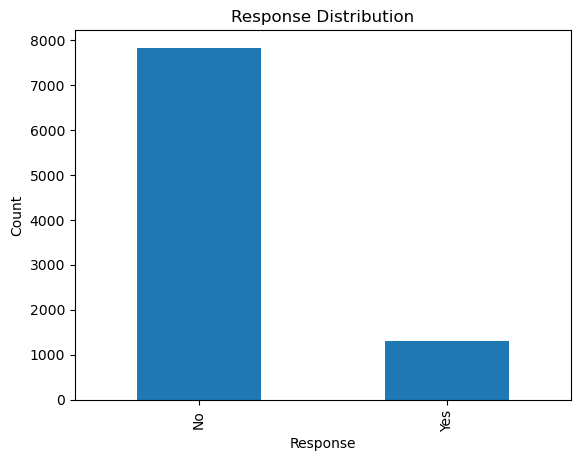

In [12]:
counts.plot(kind="bar")


plt.xlabel("Response")
plt.ylabel("Count")
plt.title("Response Distribution")


plt.show()

In [13]:
#Show a plot of the response rate by the sales channel.

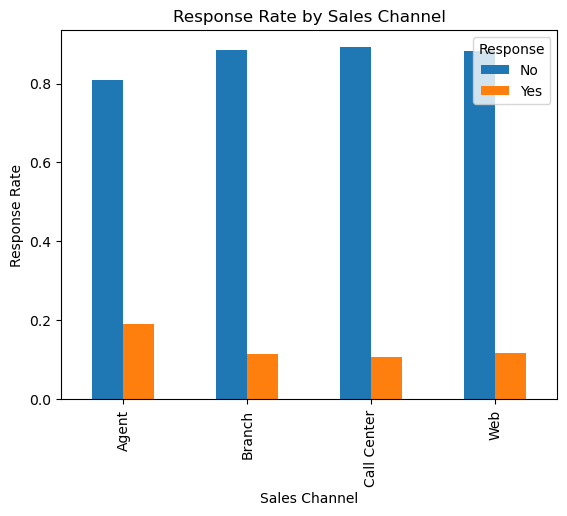

In [14]:

# use groupby (=somme.si.ens)
response_rates = file1.groupby('Sales Channel')["Response"].value_counts(normalize=True)


response_rates.unstack().plot(kind="bar")

# to get title
plt.xlabel("Sales Channel")
plt.ylabel("Response Rate")
plt.title("Response Rate by Sales Channel")

plt.show()

In [15]:
#Show a plot of the response rate by the total claim amount.

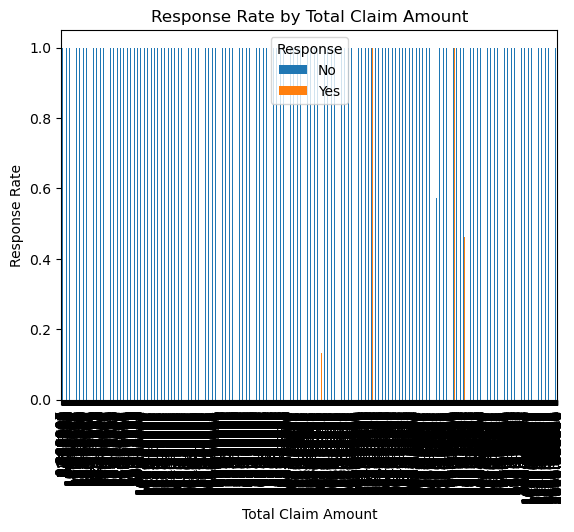

In [16]:
response_rates2 = file1.groupby('Total Claim Amount')["Response"].value_counts(normalize=True)

response_rates2.unstack().plot(kind="bar")

plt.xlabel("Total Claim Amount")
plt.ylabel("Response Rate")
plt.title("Response Rate by Total Claim Amount")

plt.show()

In [17]:
# I will split the total claim amount in 10 to have abetter understanding because the previous graph give us no help

In [18]:
file1['Total_Claim_Amount_Decile'] = pd.qcut(file1['Total Claim Amount'], q=10, labels=['D1', 'D2', 'D3', 'D4','D5', 'D6', 'D7', 'D8', 'D9', 'D10'])

file1[['Total Claim Amount', 'Total_Claim_Amount_Decile']]

,Total Claim Amount,Total_Claim_Amount_Decile
0,384.811147,D6
1,1131.464935,D10
2,566.472247,D8
3,529.881344,D8
4,138.130879,D2
...,...,...
9129,198.234764,D2
9130,379.200000,D5
9131,790.784983,D10
9132,691.200000,D9


In [19]:
# I'll make a new data frame with what I need

In [20]:
file2 = file1[['Total Claim Amount', 'Total_Claim_Amount_Decile','Response']]

In [21]:
file2.head()

,Total Claim Amount,Total_Claim_Amount_Decile,Response
0,384.811147,D6,No
1,1131.464935,D10,No
2,566.472247,D8,No
3,529.881344,D8,No
4,138.130879,D2,No


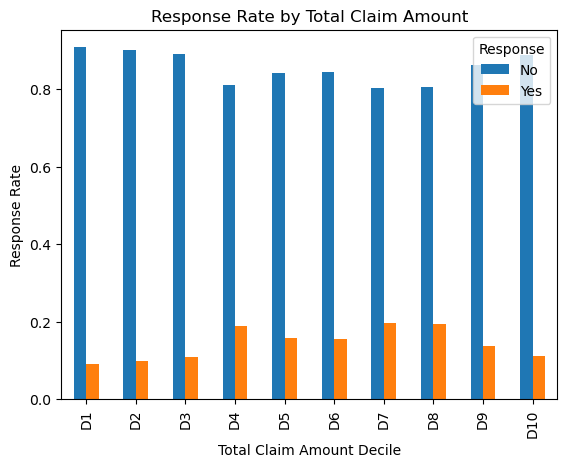

In [22]:
response_rates3 = file2.groupby('Total_Claim_Amount_Decile')["Response"].value_counts(normalize=True)

response_rates3.unstack().plot(kind="bar")

plt.xlabel("Total Claim Amount Decile")
plt.ylabel("Response Rate")
plt.title("Response Rate by Total Claim Amount")

plt.show()

In [23]:
# Show a plot of the response rate by income.

In [24]:
# Because there are so many values for 'income' I'll use the same methode

In [25]:
file1['Income_Decile'] = pd.qcut(file1['Income'], q=10, labels=['D1', 'D2', 'D3', 'D4','D5', 'D6', 'D7', 'D8', 'D9', 'D10'])

file1[['Income', 'Income_Decile']]

ValueError: Bin edges must be unique: array([    0. ,     0. ,     0. , 18494.1, 25820. , 33889.5, 44428. ,
       56980. , 68532.8, 82103.5, 99981. ]).
You can drop duplicate edges by setting the 'duplicates' kwarg

In [ ]:
file1.head(1)

In [ ]:
filenew = pd.read_csv('marketing_customer_analysis.csv')

In [ ]:
filenew.head(1)

In [ ]:
filenew['Income_Decile'] = pd.qcut(file1['Income'], q=10, labels=['D1', 'D2', 'D3', 'D4','D5', 'D6', 'D7', 'D8', 'D9', 'D10'])

filenew[['Income', 'Income_Decile', 'Response']]

In [ ]:
# I don't get why I have NaN in Income_Decile on the filled rows on column income

In [ ]:
response_rates4 = filenew.groupby('Income_Decile')["Response"].value_counts(normalize=True)

response_rates4.unstack().plot(kind="bar")

plt.xlabel("Income Decile")
plt.ylabel("Response Rate")
plt.title("Response Rate by Total Claim Amount")

plt.show()

In [ ]:
# Nor right

###Lab | Customer Analysis Round 4

In [ ]:
file1.head(1)

In [ ]:
#Check the data types of the columns. Get the numeric data into dataframe called numerical and categorical columns 
#in a dataframe called categoricals. (You can use np.number and np.object to select the numerical data types 
#and categorical data types respectively)

In [ ]:
file1.dtypes

In [ ]:
numerical=file1.select_dtypes(include=np.number)

In [ ]:
numerical.head()

In [ ]:
categoricals=file1.select_dtypes(include=np.object)

In [ ]:
categoricals.head(1)

In [ ]:
# Now we will try to check the normality of the numerical variables visually

In [ ]:
# Use seaborn library to construct distribution plots for the numerical variables

In [ ]:
import seaborn as sns

In [ ]:
pd.set_option('display.max_columns', None)
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [ ]:
sns.distplot(numerical['Total Claim Amount'])

In [ ]:
sns.distplot(numerical['Income'])

In [ ]:
sns.distplot(numerical['Number of Policies'])

In [ ]:
sns.distplot(numerical)

In [ ]:
#Use Matplotlib to construct histograms

In [ ]:
plt.boxplot(file1['Income'])

# Add labels to the x and y axes
plt.xlabel('Income')
plt.ylabel('Amount')

plt.show()

In [ ]:
fig, axs = plt.subplots(2, 2)

axs[0, 0].hist(file1['Income'])
axs[0, 0].set_xlabel('Income')
axs[0, 0].set_ylabel('Frequency')

axs[0, 1].hist(file1['Total Claim Amount'])
axs[0, 1].set_xlabel('Total Claim Amount')
axs[0, 1].set_ylabel('Frequency')

axs[1, 0].hist(file1['Monthly Premium Auto'])
axs[1, 0].set_xlabel('Monthly Premium Auto')
axs[1, 0].set_ylabel('Frequency')

axs[1, 1].axis('off')


plt.show()

In [ ]:
x = file1['Total Claim Amount']
y = file1['Income']
plt.scatter(x, y)


plt.xlabel('Total Claim Amount')
plt.ylabel('Income')


plt.show()

In [ ]:
for column in numerical.columns:
    sns.distplot(numerical[column])
    plt.show()

In [ ]:
# None of the distributions look normal

In [ ]:
# For the numerical variables, check the multicollinearity between the features. Please note that we will use 
# the column total_claim_amount later as the target variable.

In [ ]:
corr_matrix = numerical.corr()

In [ ]:
corr_matrix

In [ ]:
sns.heatmap(corr_matrix, annot=True)

In [ ]:
sns.pairplot(numerical)

In [ ]:
# Drop one of the two features that show a high correlation between them (greater than 0.9). Write code for both the correlation matrix and for seaborn heatmap. If there is no pair of features that have a high correlation, 
# then do not drop any features

# looking at the heatmap there are no correlation over 0,9 so nothing to drop.

In [ ]:
# (Further processing...)

# X-y split.
# Normalize (numerical).

In [28]:
y = file1['Total Claim Amount']  # assign "Total Claim Amount" column to the variable y. This is  the target variable that we want to predict.
X = file1.drop(['Total Claim Amount'], axis=1)
X.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size,Total_Claim_Amount_Decile
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize,D6
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize,D10
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize,D8
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize,D8
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize,D2


In [29]:
X_num = X.select_dtypes(include=np.number)  # here Iput numercial and object values appart
X_cat = X.select_dtypes(include=np.object)  # X_num store the numerical and X_cat the categorical
X_num

/var/folders/2n/45mrq41x2yq_l53c6v6v5qnc0000gn/T/ipykernel_26688/2662713357.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_cat = X.select_dtypes(include=np.object)  # X_num store the numerical and X_cat the categorical


,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies
0,2763.519279,56274,69,32,5,0,1
1,6979.535903,0,94,13,42,0,8
2,12887.431650,48767,108,18,38,0,2
3,7645.861827,0,106,18,65,0,7
4,2813.692575,43836,73,12,44,0,1
...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2
9130,3096.511217,21604,79,14,28,0,1
9131,8163.890428,0,85,9,37,3,2
9132,7524.442436,21941,96,34,3,0,3


In [30]:
# Normalize (numerical)

In [31]:
from sklearn.preprocessing import Normalizer   # libraries I'll need
from sklearn.preprocessing import MinMaxScaler  
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [32]:
transformer = MinMaxScaler().fit(X_num) # calculates the min and max values of each column in X_num
x_minmax = transformer.transform(X_num) # the scaled data is assigned to the variable x_minmax
print(x_minmax.shape)

(9134, 7)


In [33]:
X_num_norm = pd.DataFrame(x_minmax,columns=X_num.columns)
X_num_norm.head() 

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies
0,0.010629,0.562847,0.033755,0.914286,0.050505,0.0,0.000
1,0.062406,0.000000,0.139241,0.371429,0.424242,0.0,0.875
2,0.134960,0.487763,0.198312,0.514286,0.383838,0.0,0.125
3,0.070589,0.000000,0.189873,0.514286,0.656566,0.0,0.750
4,0.011245,0.438443,0.050633,0.342857,0.444444,0.0,0.000


In [34]:
import seaborn as sns

/Users/hugopabst/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


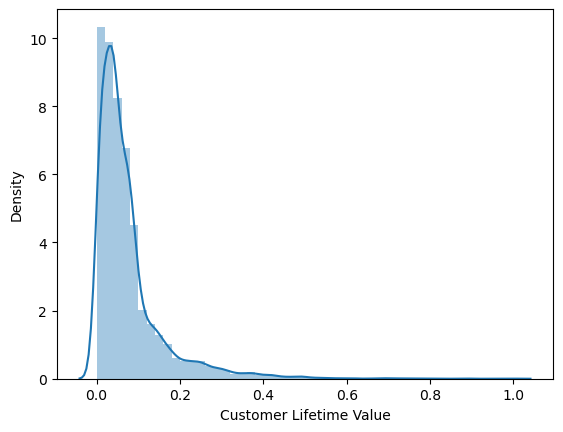

/Users/hugopabst/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


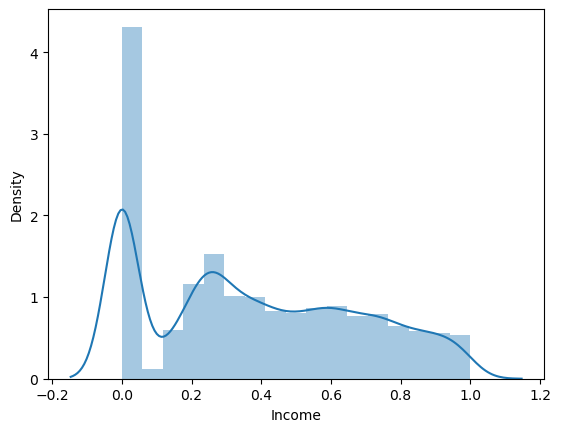

/Users/hugopabst/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


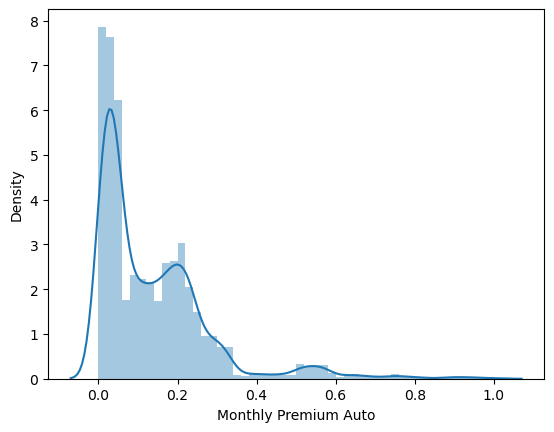

/Users/hugopabst/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


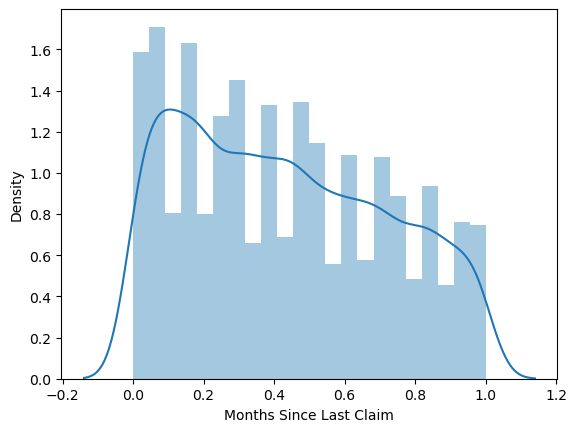

/Users/hugopabst/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


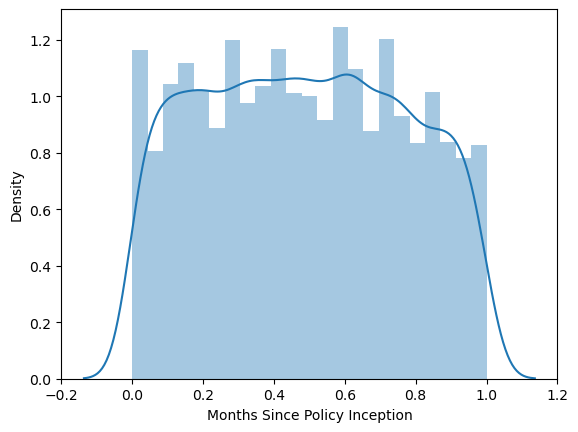

/Users/hugopabst/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


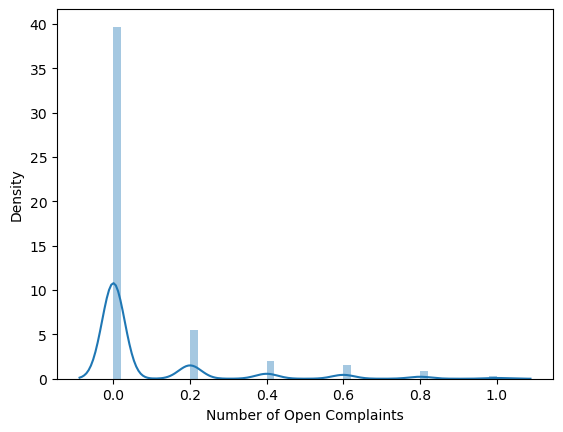

/Users/hugopabst/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


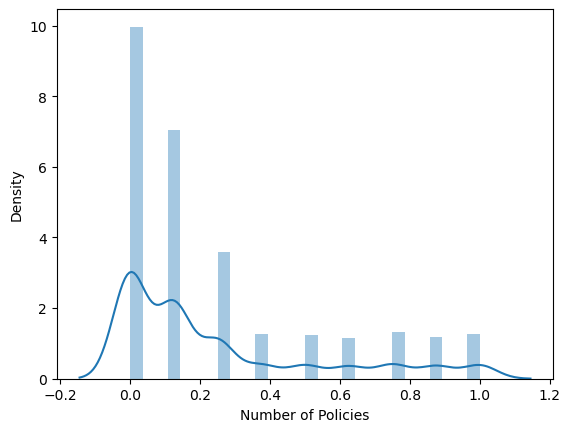

In [35]:
for column in X_num_norm.columns:   # here we verify if it has been normalized
    sns.distplot(X_num_norm[column])
    plt.show()  

# WEEK 3 ROUND 6

In [36]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [37]:
# One Hot/Label Encoding (categorical).

In [38]:
X_cat

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,2/10/11,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,2/12/11,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,2/6/11,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,2/3/11,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [41]:
X_cat = X_cat.drop(["Customer","Effective To Date"], axis = 1) # I drop columns that I don't want
X_cat

,State,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [42]:
X_cat = pd.get_dummies(X_cat, drop_first = True)  # convert categorical variables into a numerical format that can be used in machine learning models.
X_cat

,State_California,State_Nevada,State_Oregon,State_Washington,Response_Yes,Coverage_Extended,Coverage_Premium,Education_College,Education_Doctor,Education_High School or Below,...,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Medsize,Vehicle Size_Small
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0
3,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
9130,1,0,0,0,1,1,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
9131,1,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
9132,1,0,0,0,0,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
# Concat DataFrames

In [43]:
dataconcat = pd.concat([X_num, X_cat], axis = 1) # I put back together the two dataframe into one again.
dataconcat                                       # so know I can work with both nuerical and categorial

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,State_California,State_Nevada,State_Oregon,...,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Medsize,Vehicle Size_Small
0,2763.519279,56274,69,32,5,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,6979.535903,0,94,13,42,0,8,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,12887.431650,48767,108,18,38,0,2,0,1,0,...,0,0,0,0,0,0,0,1,1,0
3,7645.861827,0,106,18,65,0,7,1,0,0,...,0,1,0,0,0,1,0,0,1,0
4,2813.692575,43836,73,12,44,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,1,0,0,...,0,0,1,0,0,0,0,0,1,0
9130,3096.511217,21604,79,14,28,0,1,1,0,0,...,1,0,0,0,0,0,0,0,1,0
9131,8163.890428,0,85,9,37,3,2,1,0,0,...,1,0,0,0,0,0,0,0,1,0
9132,7524.442436,21941,96,34,3,0,3,1,0,0,...,1,0,0,0,0,0,0,0,0,0


In [44]:
# Linear Regression
#    Train-test split.
#    Apply linear regression.

In [45]:
# Train-test split. 

X_train, X_test, y_train , y_test = train_test_split(X_cat, y, test_size=0.3, random_state=42)

# split the dataset into training and testing sets. 
# The train_test_split() function randomly splits the data into two subsets,
# one for training the model and the other for testing the model.

# X_cat is the feature matrix containing the encoded categorical variables. 
# y is the target variable.

# 0.3 means that 30% of the data will be used for testing 

# The random_state parameter = 42, is an random value used to ensure reproducibility. 
# Setting a random state allows that the same random data points are selected each time the code is running.

In [47]:
# Linear Regression.

model = LinearRegression()
model.fit(X_train,y_train)

# linear regression is a model that tries to fit a linear relationship between 
# the independent variables (X_train) 
# and the dependent variable (y_train, the 
# target variable representing the total claim amount).

LinearRegression()

In [48]:
len(dataconcat)

9134

In [50]:
len(X_train)

6393

In [51]:
len(X_test)

2741

In [52]:
# Model Validation:
# 1. Description:
  # 1.1  R2.
  # 1.2  MSE.
  # 1.3  RMSE.
  # 1.4  MAE.

In [53]:
#Predicting on X_test

predictions  = model.predict(X_test)
predictions


# The predictions variable will be an array of predicted values 
# for the total claim amount based on the encoded categorical variables in X_test.

array([216.85987554, 434.77629135, 437.17237554, ..., 658.01612554,
        97.98487554, 588.55323759])

In [57]:
predictions.shape

(2741,)

In [54]:
y_test

708     218.598065
47      447.793440
3995    451.200000
1513    355.641958
3686    470.097411
           ...    
4271    518.400000
7923    650.521790
5633    652.800000
8432    150.878447
681     452.616872
Name: Total Claim Amount, Length: 2741, dtype: float64

In [58]:
r2 = r2_score(y_test, predictions)
RMSE = mean_squared_error(y_test, predictions, squared=False)
MSE = mean_squared_error(y_test, predictions)
print("r2 = ", r2)
print("RMSE = ", RMSE)
print("MSE = ", MSE)

r2 =  0.7438897776862547
RMSE =  144.59384801418372
MSE =  20907.38088354886


In [ ]:
# R2 has to be close to 1. then we have to calculate R2 square and the closer to one it is the better. 
# here it's around 0.55 not so good
